**Project Description: Chest X-ray Pneumonia Classification Using Convolutional Neural Networks**

In this project, a Convolutional Neural Network (CNN) model is developed to classify chest X-ray images into two categories: 'Normal' and 'Pneumonia'. The dataset used for training and testing consists of chest X-ray images obtained from the Chest X-ray Pneumonia dataset.

**Data Preprocessing:**
- The dataset is divided into training and testing sets.
- Image paths are obtained using the `glob` module, and then combined to form dataframes representing the training and testing datasets.
- The distribution of classes (Normal and Pneumonia) in both training and testing datasets is visualized using pie charts.

**Model Architecture:**
- The CNN model is constructed using the Keras Sequential API.
- Three convolutional layers with ReLU activation and max-pooling layers are stacked to extract features from the input images.
- The output of the convolutional layers is flattened and passed through a dense layer with ReLU activation.
- The final output layer uses a sigmoid activation function for binary classification.

**Model Compilation and Training:**
- The model is compiled using binary cross-entropy as the loss function and the Adam optimizer with a learning rate of 0.0005.
- Training data is augmented using techniques such as shear range, zoom range, and horizontal flip to increase the robustness of the model.
- The model is trained using the `fit` method, and the training/validation loss and accuracy are monitored for each epoch.

**Results Visualization:**
- Training and validation accuracy, as well as loss, are plotted to visualize the model's performance over epochs.
- The plotted graphs help in analyzing the training process and identifying overfitting or underfitting issues.

Overall, this project demonstrates the use of CNNs for automated classification of chest X-ray images, which could potentially assist medical professionals in diagnosing pneumonia more efficiently.

In [ ]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

import glob

In [17]:
# Constructing the test and training dataframes

main_path = "../input/chest-xray-pneumonia/chest_xray"

train_path = os.path.join(main_path, "train")
test_path = os.path.join(main_path, "test")

# The glob.glob() function returns a possibly empty list of paths matching the pathname pattern, which must be a string containing the path specification.

train_normal = glob.glob(train_path + "/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path + "/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path + "/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path + "/PNEUMONIA/*.jpeg")

# Combining the lists of normal and pneumonia images for training and creating a DataFrame

train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal'] * len(train_normal), ['Pneumonia'] * len(train_pneumonia)]), columns=['class'])
df_train['image'] = [x for x in train_list]

# Combining the lists of normal and pneumonia images for testing and creating a DataFrame

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal'] * len(test_normal), ['Pneumonia'] * len(test_pneumonia)]), columns=['class'])
df_test['image'] = [x for x in test_list]


In [18]:
df_train

,class,image
0,Normal,../input/chest-xray-pneumonia/chest_xray/train...
1,Normal,../input/chest-xray-pneumonia/chest_xray/train...
2,Normal,../input/chest-xray-pneumonia/chest_xray/train...
3,Normal,../input/chest-xray-pneumonia/chest_xray/train...
4,Normal,../input/chest-xray-pneumonia/chest_xray/train...
...,...,...
5211,Pneumonia,../input/chest-xray-pneumonia/chest_xray/train...
5212,Pneumonia,../input/chest-xray-pneumonia/chest_xray/train...
5213,Pneumonia,../input/chest-xray-pneumonia/chest_xray/train...
5214,Pneumonia,../input/chest-xray-pneumonia/chest_xray/train...


In [19]:
df_test

,class,image
0,Normal,../input/chest-xray-pneumonia/chest_xray/test/...
1,Normal,../input/chest-xray-pneumonia/chest_xray/test/...
2,Normal,../input/chest-xray-pneumonia/chest_xray/test/...
3,Normal,../input/chest-xray-pneumonia/chest_xray/test/...
4,Normal,../input/chest-xray-pneumonia/chest_xray/test/...
...,...,...
619,Pneumonia,../input/chest-xray-pneumonia/chest_xray/test/...
620,Pneumonia,../input/chest-xray-pneumonia/chest_xray/test/...
621,Pneumonia,../input/chest-xray-pneumonia/chest_xray/test/...
622,Pneumonia,../input/chest-xray-pneumonia/chest_xray/test/...


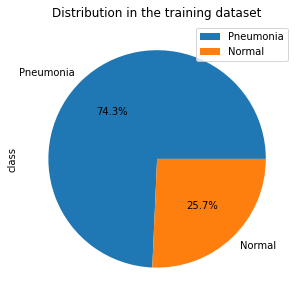

In [20]:
# Observing the distribution of pneumonia in the training set

plt.figure(figsize=(7, 5))

# Plotting a pie chart to visualize the distribution of classes in the training dataset
df_train['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.legend(labels=['Pneumonia', 'Normal'])
plt.title('Distribution in the training dataset')
plt.show()


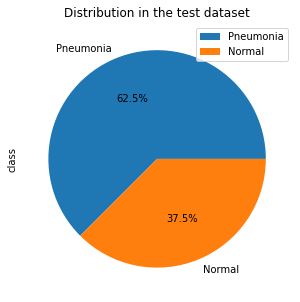

In [21]:
# Observing the distribution of pneumonia in the testing set

plt.figure(figsize=(7, 5))

# Plotting a pie chart to visualize the distribution of classes in the testing dataset
df_test['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.legend(labels=['Pneumonia', 'Normal'])
plt.title('Distribution in the test dataset')
plt.show()


In [23]:
# This code creates the CNN (Convolutional Neural Network) model with the requested layers

model = models.Sequential()

# Adding a 2D convolutional layer with 32 filters, each of size (3, 3), using ReLU activation function
# Padding is set to 'same' to ensure the output size matches the input size, and strides are set to (1,1)
# Input shape is (64, 64, 3) representing the image dimensions (height, width, channels)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=(1, 1), input_shape=(64, 64, 3)))

# Adding a max pooling layer to reduce the spatial dimensions by taking the maximum value over a pool size of (2, 2)
model.add(layers.MaxPooling2D((2, 2)))

# Adding another 2D convolutional layer with similar parameters as the first layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=(1, 1)))

# Adding another max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Adding another 2D convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=(1, 1)))

# Adding another max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the output to prepare for the fully connected layers
model.add(layers.Flatten())

# Adding a dense layer with 128 neurons and ReLU activation function
model.add(layers.Dense(128, activation='relu'))

# Adding the output layer with 1 neuron and sigmoid activation function for binary classification
model.add(layers.Dense(1, activation='sigmoid'))


In [24]:
# Printing a summary of the CNN model architecture, including the number of parameters and the output shape of each layer
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)             

In [25]:
# For this problem, we need to choose binary cross-entropy as the loss function
# because there are only two classes, 'Normal' and 'Pneumonia'

# Setting up the Adam optimizer with a learning rate of 0.0005
opt = Adam(learning_rate=0.0005)

# Compiling the model with binary cross-entropy as the loss function, Adam optimizer,
# and accuracy as the evaluation metric
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


In [26]:
# ImageDataGenerator for preprocessing images by rescaling them
train_datagen = ImageDataGenerator(rescale=1/255)  # Rescaling images
test_datagen = ImageDataGenerator(rescale=1/255)  # Rescaling images

# Generating batches of training images with a batch size of 32 using the train_datagen generator
# Images are resized to (64, 64) and binary class mode is used since it's a binary classification task
train_generator = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='binary')

# Generating batches of validation images with a batch size of 32 using the test_datagen generator
# Images are resized to (64, 64) and binary class mode is used since it's a binary classification task
validation_generator = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test',
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [27]:
# This code obtains the dimensions of the data contained in the batch as well as the dimensions of the labels.

# Iterating over batches of data and labels from the train_generator
for data_batch, labels_batch in train_generator:
    # Printing the shape of the data batch (e.g., (32, 64, 64, 3) representing 32 images of size 64x64 with 3 channels)
    print('data batch shape:', data_batch.shape)
    # Printing the shape of the labels batch (e.g., (32,) representing 32 labels)
    print('labels batch shape:', labels_batch.shape)
    # Breaking the loop after printing the shapes of the first batch to avoid printing for all batches
    break

data batch shape: (32, 64, 64, 3)
labels batch shape: (32,)


In [28]:
# Training the model using the fit method

# history stores the training/validation loss and accuracy for each epoch
history = model.fit(
    # Training data generator
    train_generator,
    # Number of epochs
    epochs=5,
    # Validation data generator
    validation_data=validation_generator,
    # Number of steps per epoch, calculated as total number of training samples divided by batch size
    steps_per_epoch=(len(df_train) / 32),
    # Number of steps for validation, calculated as total number of validation samples divided by batch size
    validation_steps=(len(df_test) / 32)
)

Epoch 1/5
163/163 [==============================] - 71s 434ms/step - loss: 0.3037 - accuracy: 0.8706 - val_loss: 0.4379 - val_accuracy: 0.8253
Epoch 2/5
163/163 [==============================] - 70s 432ms/step - loss: 0.1192 - accuracy: 0.9563 - val_loss: 0.6429 - val_accuracy: 0.7837
Epoch 3/5
163/163 [==============================] - 71s 435ms/step - loss: 0.1024 - accuracy: 0.9592 - val_loss: 0.5886 - val_accuracy: 0.7917
Epoch 4/5
163/163 [==============================] - 70s 429ms/step - loss: 0.0822 - accuracy: 0.9689 - val_loss: 1.4131 - val_accuracy: 0.6987
Epoch 5/5
163/163 [==============================] - 69s 425ms/step - loss: 0.0795 - accuracy: 0.9707 - val_loss: 0.9165 - val_accuracy: 0.7676


After 10 epochs, we have an accuracy of 0.75 for dataset validation.

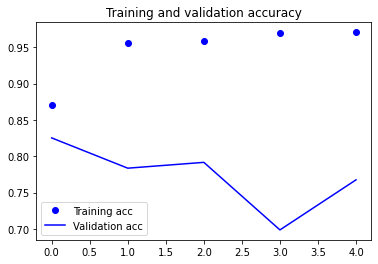

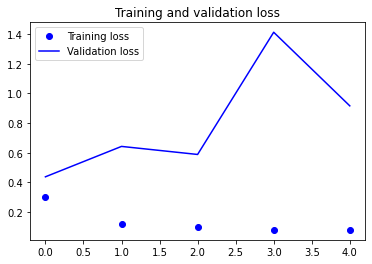

In [30]:
# Plotting the loss and accuracy for training and validation data during the training phase

# Extracting the accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Number of epochs

# Plotting training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')  # Training accuracy
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # Validation accuracy
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plotting training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')  # Training loss
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # Validation loss
plt.title('Training and validation loss')
plt.legend()

plt.show()



Overfitting occurs because we have too few samples to draw conclusions from, preventing us from training a model capable of generalizing to new data. Data augmentation involves generating more training data from existing training data samples by "augmenting" samples with a number of random transformations that produce credible-looking images. The goal is that during training, our model never sees exactly the same image twice. This allows the model to be exposed to more data variability and generalize better. In Keras, this can be done by configuring a number of random transformations to be performed on the images read by our ImageDataGenerator instance.



Examples of data augmentation techniques that can be used to overcome data scarcity:

- rotation_range is a value in degrees (0-180), a range within which images can be randomly rotated.
- width_shift and height_shift are ranges (as a fraction of the total width or height) within which images can be randomly shifted vertically or horizontally.
- shear_range is a range allowing randomly applied shear transformations.
- zoom_range allows random zooming within images.
- horizontal_flip is for randomly flipping half of the images horizontally.
- fill_mode is the strategy used to fill newly created pixels, which may appear after rotation or width/height shifting.

In [31]:
# Data Augmentation
# shear_range is a range allowing randomly applied shear transformations
# zoom_range allows random zooming within images
# horizontal_flip is for randomly flipping half of the images horizontally

# Data augmentation for training images
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Image rescaling for testing images
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating batches of training images with augmentation using train_datagen generator
training_set = train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

# Generating batches of validation images using test_datagen generator
testing_set = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test',
                                               target_size=(64, 64),
                                               batch_size=32,
                                               class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [32]:
# Training the model using the fit method

# history stores the training/validation loss and accuracy for each epoch
history = model.fit(
    # Training data generator
    training_set,
    # Number of epochs
    epochs=5,
    # Validation data generator
    validation_data=testing_set,
    # Number of steps per epoch, calculated as total number of training samples divided by batch size
    steps_per_epoch=(len(df_train) / 32),
    # Number of steps for validation, calculated as total number of validation samples divided by batch size
    validation_steps=(len(df_test) / 32)
)

Epoch 1/5
163/163 [==============================] - 76s 466ms/step - loss: 0.2256 - accuracy: 0.9066 - val_loss: 0.3551 - val_accuracy: 0.8670
Epoch 2/5
163/163 [==============================] - 76s 464ms/step - loss: 0.1980 - accuracy: 0.9201 - val_loss: 0.7775 - val_accuracy: 0.7404
Epoch 3/5
163/163 [==============================] - 75s 462ms/step - loss: 0.1629 - accuracy: 0.9331 - val_loss: 0.5431 - val_accuracy: 0.8365
Epoch 4/5
163/163 [==============================] - 76s 469ms/step - loss: 0.1669 - accuracy: 0.9377 - val_loss: 0.7542 - val_accuracy: 0.7644
Epoch 5/5
163/163 [==============================] - 77s 470ms/step - loss: 0.1542 - accuracy: 0.9394 - val_loss: 0.4398 - val_accuracy: 0.8526


Au bout de 10 epochs, nous obtenons une précsion de 0,91 pour le validation dataset avec l'augmentation de données

In [33]:
model.save('chest_xray_pneumonia_prediction.h5') # Saving the model

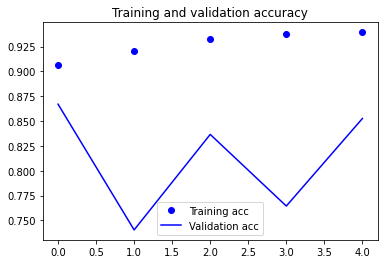

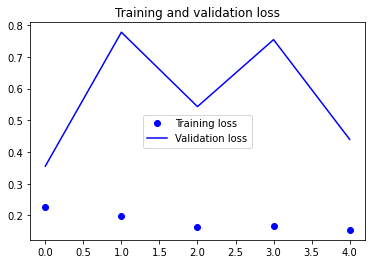

In [34]:
# Plotting the loss and accuracy for training and validation data during the training phase

# Extracting the accuracy and loss values from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Number of epochs

# Plotting training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')  # Training accuracy
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # Validation accuracy
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plotting training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')  # Training loss
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # Validation loss
plt.title('Training and validation loss')
plt.legend()

plt.show()

Data augmentation has allowed us to reduce the problem of overfitting because the validation accuracy increases at the same time as the training accuracy.